# Overfit and Regularization Exercises

In [162]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("tips")

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [163]:
df = pd.get_dummies(df, drop_first = False)

df.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


---
## E3.0 A) EDA

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_bill   244 non-null    float64
 1   tip          244 non-null    float64
 2   size         244 non-null    int64  
 3   sex_Male     244 non-null    uint8  
 4   sex_Female   244 non-null    uint8  
 5   smoker_Yes   244 non-null    uint8  
 6   smoker_No    244 non-null    uint8  
 7   day_Thur     244 non-null    uint8  
 8   day_Fri      244 non-null    uint8  
 9   day_Sat      244 non-null    uint8  
 10  day_Sun      244 non-null    uint8  
 11  time_Lunch   244 non-null    uint8  
 12  time_Dinner  244 non-null    uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 8.2 KB


In [165]:
df.describe()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.643443,0.356557,0.381148,0.618852,0.254098,0.077869,0.356557,0.311475,0.278689,0.721311
std,8.902412,1.383638,0.951100,0.479967,0.479967,0.486667,0.486667,0.436248,0.268516,0.479967,0.464049,0.449276,0.449276
min,3.070000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.347500,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.795000,2.900000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,24.127500,3.562500,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,50.810000,10.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---
## E3.0 B) Exploratory Plots

---
## E3.0 C) Correlation Plots

In [166]:
# sns.pairplot(df, kind = "reg"); # too many to plot all at once when using dummy features

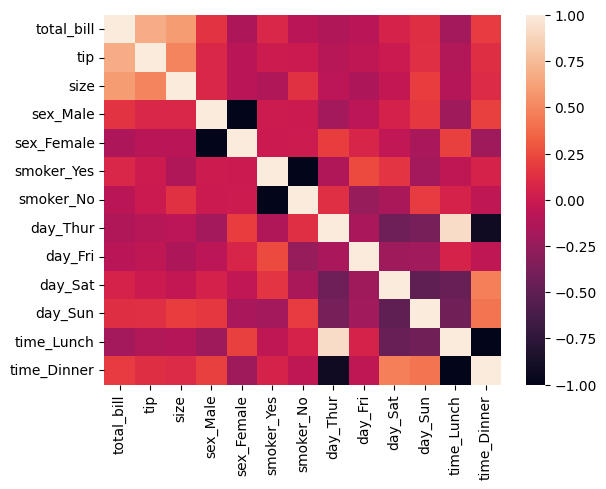

In [167]:
corr = df.corr(numeric_only = True)

sns.heatmap(corr);

In [168]:
df.head(0)

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner


In [169]:
from statsmodels.formula.api import ols

results = ols("tip ~ day_Fri + day_Sat + day_Sun", data = df).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.672
Date:                Thu, 23 Feb 2023   Prob (F-statistic):              0.174
Time:                        21:21:02   Log-Likelihood:                -422.43
No. Observations:                 244   AIC:                             852.9
Df Residuals:                     240   BIC:                             866.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7715      0.175     15.837      0.000       2.427       3.116
day_Fri       -0.0367      0.361     -0.102      0.919      -0.748       0.675
day_Sat        0.2217      0.229      0.968      0.334      -0.229       0.673
day_Sun        0.4837      0.236      2.051      0.041       0.019       0.948
==============================================================================
Omnibus:                       82.801   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.276
Skew:                           1.492   Prob(JB):                     1.82e-52
Kurtosis:                       6.811   Cond. No.                         5.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='day_Thur', ylabel='tip'>

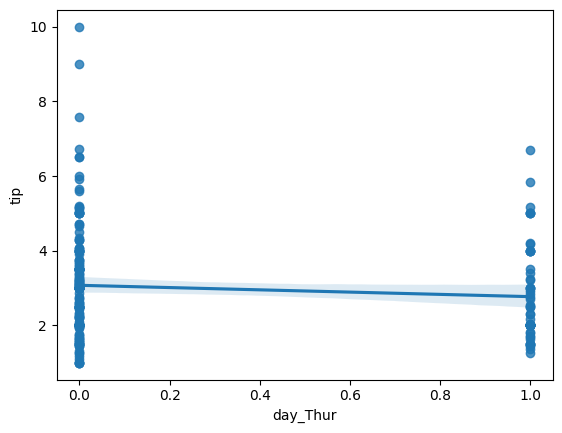

In [170]:
sns.regplot(df, x = "day_Thur", y = "tip")

Text(0, 0.5, 'Tip')

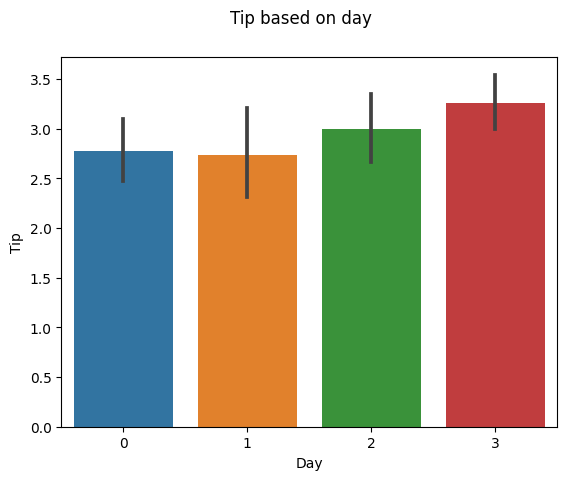

In [171]:
sns.barplot([df[df["day_Thur"] == 1]["tip"], df[df["day_Fri"] == 1]["tip"], df[df["day_Sat"] == 1]["tip"], df[df["day_Sun"] == 1]["tip"]]);
plt.suptitle("Tip based on day");
plt.xlabel("Day")
plt.ylabel("Tip")

---
## E3.0 D) Discuss Findings With a Colleague

---
## E3.1) Train|Test Split

In [172]:
from sklearn.model_selection import train_test_split